In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual # для интерактивного управления графиками
from sklearn.impute import KNNImputer
# для интерактивного управления графиками: cmd: "jupyter nbextension enable --py widgetsnbextension"
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
import sklearn
from sklearn.metrics import mean_absolute_percentage_error
from prettytable import PrettyTable
from scipy.stats import iqr

## 1. Загрузите данные 

In [184]:
data = pd.read_csv('PerfIndicators_RusUniversities_01012018/data.csv', delimiter=';')
structure = pd.read_csv('PerfIndicators_RusUniversities_01012018/structure.csv', delimiter='\t')
region_info = data[['region_code', 'region_name']]
region_info.set_index('region_code', inplace=True)
region_info = region_info.to_dict()['region_name']

In [19]:
s = 0
for i in range(1, 6):
    s += (90.25 - (4.8 + i) ** 2) / (90.25 - (4.8 ** 2)) * (2*i - 1)
s - 2.0391 ** 2

1.395560254127358

In [3]:
90.25 - 4.5 ** 2


70.0

## 2. Ознакомьтесь с данными 

In [185]:
data.head()

,federal_district,federal_district_short,region_code,region_name,okato,id,name,name_short,year,e1,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2013,61.88,...,8.148,1.8060,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,3781.40
1,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2014,55.81,...,15.721,29.7306,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,3749.05
2,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2015,57.45,...,20.482,55.8250,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,3459.40
3,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2016,59.44,...,4.849,22.3054,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2017,60.15,...,3.993,17.0247,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00


In [186]:
print(f'Кол-во строк: {data.shape[0]}\nКол-во столбцов: {data.shape[1]}')

Кол-во строк: 2564
Кол-во столбцов: 27


In [187]:
structure.fillna('-', inplace=True)
structure

,field name,english description,russian description,measure,okei_code,format
0,federal_district,Federal'nyj okrug,Федеральный округ,-,-,string
1,federal_district_short,Sokrashchennoe naimenovanie Federal'nogo okruga,Сокращенное наименование Федерального округа,-,-,string
2,region_code,"Kod sub""ekta RF",Код субъекта РФ,-,-,string
3,region_name,"Sub""ekt RF",Субъект РФ,-,-,string
4,okato,OKATO,ОКАТО,-,-,string
5,id,Identifikacionnyj nomer obrazovatel'noj organi...,Идентификационный номер образовательной органи...,-,-,int
6,name,Polnoe naimenovanie obrazovatel'noj organizacii,Полное наименование образовательной организации,-,-,string
7,name_short,Korotkoe naimenovanie obrazovatel'noj organizacii,Короткое наименование образовательной организации,-,-,string
8,year,God,Год,-,-,int
9,e1,"Otnoshenie summy srednih ballov EGE studentov,...","Отношение суммы средних баллов ЕГЭ студентов, ...",-,-,numeric


## 3. Проверьте форматы данных 

In [188]:
print('Типы данных в датафрейме:\n', data.dtypes.to_string())

Типы данных в датафрейме:
 federal_district           object
federal_district_short     object
region_code                 int64
region_name                object
okato                       int64
id                          int64
name                       object
name_short                 object
year                        int64
e1                        float64
e2                        float64
e3                        float64
e4                        float64
e5                        float64
e6                        float64
e8                        float64
ege_budg                  float64
wos                       float64
scopus                    float64
rsci                      float64
rnd                       float64
total_income              float64
square                      int64
phd_share                 float64
pps                         int64
rnd_private               float64
pk                        float64


Все столбцы в данных считались правильно.

## 4. «Облегчите» набор данных за счет удаления неинформативных показателей 

### okato, region_name                       

In [189]:
data.okato.unique()

array([79000000000,  1000000000, 10000000000,  8000000000, 25000000000,
        3000000000, 12000000000, 40000000000, 80000000000, 14000000000,
       15000000000, 81000000000,  5000000000, 17000000000, 18000000000,
       19000000000, 20000000000, 33000000000, 46000000000, 94000000000,
       84000000000, 45000000000, 96000000000, 82000000000, 99000000000,
       60000000000, 42000000000, 24000000000, 26000000000, 83000000000,
       92000000000, 85000000000, 29000000000, 30000000000, 91000000000,
       32000000000, 34000000000,  4000000000, 37000000000, 38000000000,
       75000000000, 88000000000, 89000000000, 47000000000, 22000000000,
       65000000000, 49000000000, 50000000000, 52000000000, 53000000000,
       54000000000, 56000000000, 57000000000, 86000000000, 36000000000,
        7000000000, 27000000000, 78000000000, 61000000000, 63000000000,
       64000000000, 44000000000, 90000000000, 66000000000, 87000000000,
       68000000000, 28000000000, 69000000000, 70000000000, 93000

Изучим столбец *okato*. Видно, что каждый из номеров является кодом субъекта, и содержит идентификацию блоков первого уровня классификации. Поэтому его можно удалить. Совместно с *okato* можно удалить *region_name*, теперь для идентификации региона, в котором находится ВУЗ, будет использоваться столбец *region_code* с кодом региона.

In [190]:
data.drop(['okato', 'region_name'], axis=1, inplace=True)

### federal_district

Столбец *federal_district* можно удалить, так как информацию из него легко получить с помощью столбца *federal_district_short*.

In [191]:
data.drop(['federal_district'], axis=1, inplace=True)

### name

Столбец *name* можно удалить, так как за идентификацию университета отвечают также столбцы *name_short* и *id*.

In [192]:
data.drop(['name'], axis=1, inplace=True)

## 5. Ответьте на вопросы: 

### 1. Сколько университетов в каждом федеральном округе

In [193]:
print('ФО, представленные в данных:', *data.federal_district_short.unique())

ФО, представленные в данных: ЮФО СФО ДВФО СЗФО ПФО ЦФО СКФО УФО


In [194]:
print(data.groupby(['federal_district_short'])['id'].nunique().to_string())

federal_district_short
ДВФО     32
ПФО      99
СЗФО     63
СКФО     27
СФО      70
УФО      43
ЦФО     189
ЮФО      42


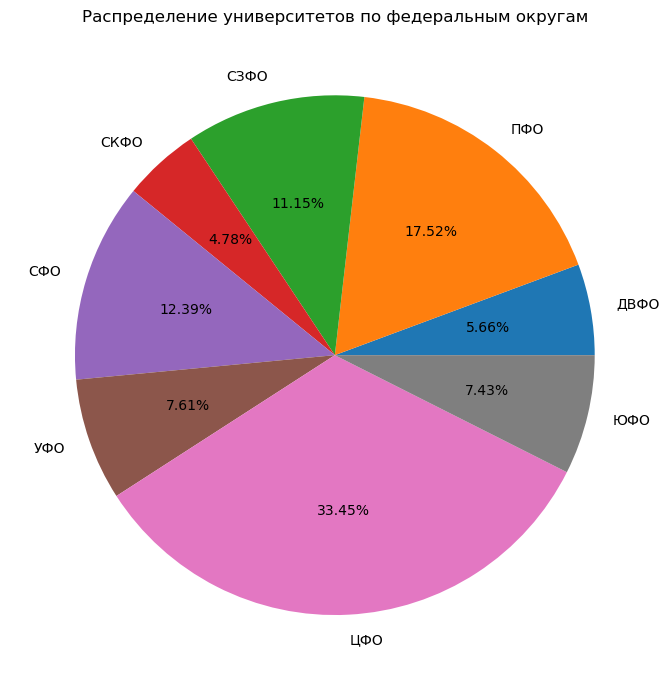

In [195]:
data.groupby(['federal_district_short'])['id'].nunique().plot.pie(autopct='%0.2f%%', ylabel='', figsize=(7, 7))
plt.title('Распределение университетов по федеральным округам')
plt.tight_layout()
plt.show()

### 2. Составьте рейтинг регионов по количеству университетов 

In [196]:
rating_by_region = data.groupby(['region_code'])['name_short'].nunique().sort_values(ascending=False)
rating_by_region.rename(index=region_info, inplace=True)

In [197]:
@interact
def show_rating_by_region(x=15):
    if x < 1:
        x = 1
    plt.title(f'Топ-{x} регионов по количеству университетов')
    ax = rating_by_region[:x].plot.barh()
    ax.set_ylabel('')
    ax.bar_label(ax.containers[0])
    return plt.show()

interactive(children=(IntSlider(value=15, description='x', max=45, min=-15), Output()), _dom_classes=('widget-…

### 3. Составьте рейтинг показателей по информативности (используйте коэффициент вариации)


Коэффициент вариации определяется как отношение стандартного отклонения σ к среднему μ:

${\displaystyle {c_{\rm {v}}}={\frac {\sigma }{\mu }}}$

Все значения указаны в %.

In [198]:
cv_func = lambda x: np.std(x, ddof=1) / np.mean (x) * 100
data_cv = data.drop(['region_code', 'id', 'year'], axis=1).select_dtypes('number').apply(cv_func).sort_values()
data_cv

e1                18.504538
ege_budg          24.107649
phd_share         24.284534
e6                31.271734
e5                49.937979
pk                94.701938
e3               104.609079
pps              104.920626
square           106.387779
e8               131.054752
rsci             148.440557
total_income     161.902202
rnd_private      251.847127
rnd              280.636199
scopus           313.399760
wos              348.541764
e4               968.502124
e2              2535.489048
dtype: float64

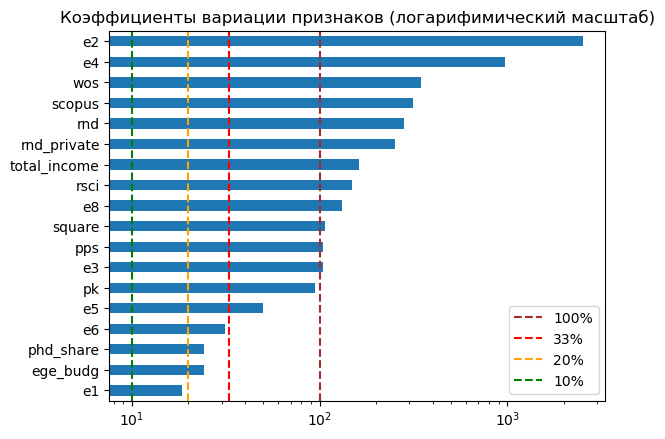

In [199]:
ax = data_cv.plot.barh(logx=True)
plt.title('Коэффициенты вариации признаков (логарифимический масштаб)')
plt.axvline(100, linestyle='--', color='brown', label='100%')
plt.axvline(33, linestyle='--', color='red', label='33%')
plt.axvline(20, linestyle='--', color='orange', label='20%')
plt.axvline(10, linestyle='--', color='green', label='10%')
plt.legend()
plt.show()

### 4. Графический анализ показателей 


Построим гистограммы всех численных признаков.

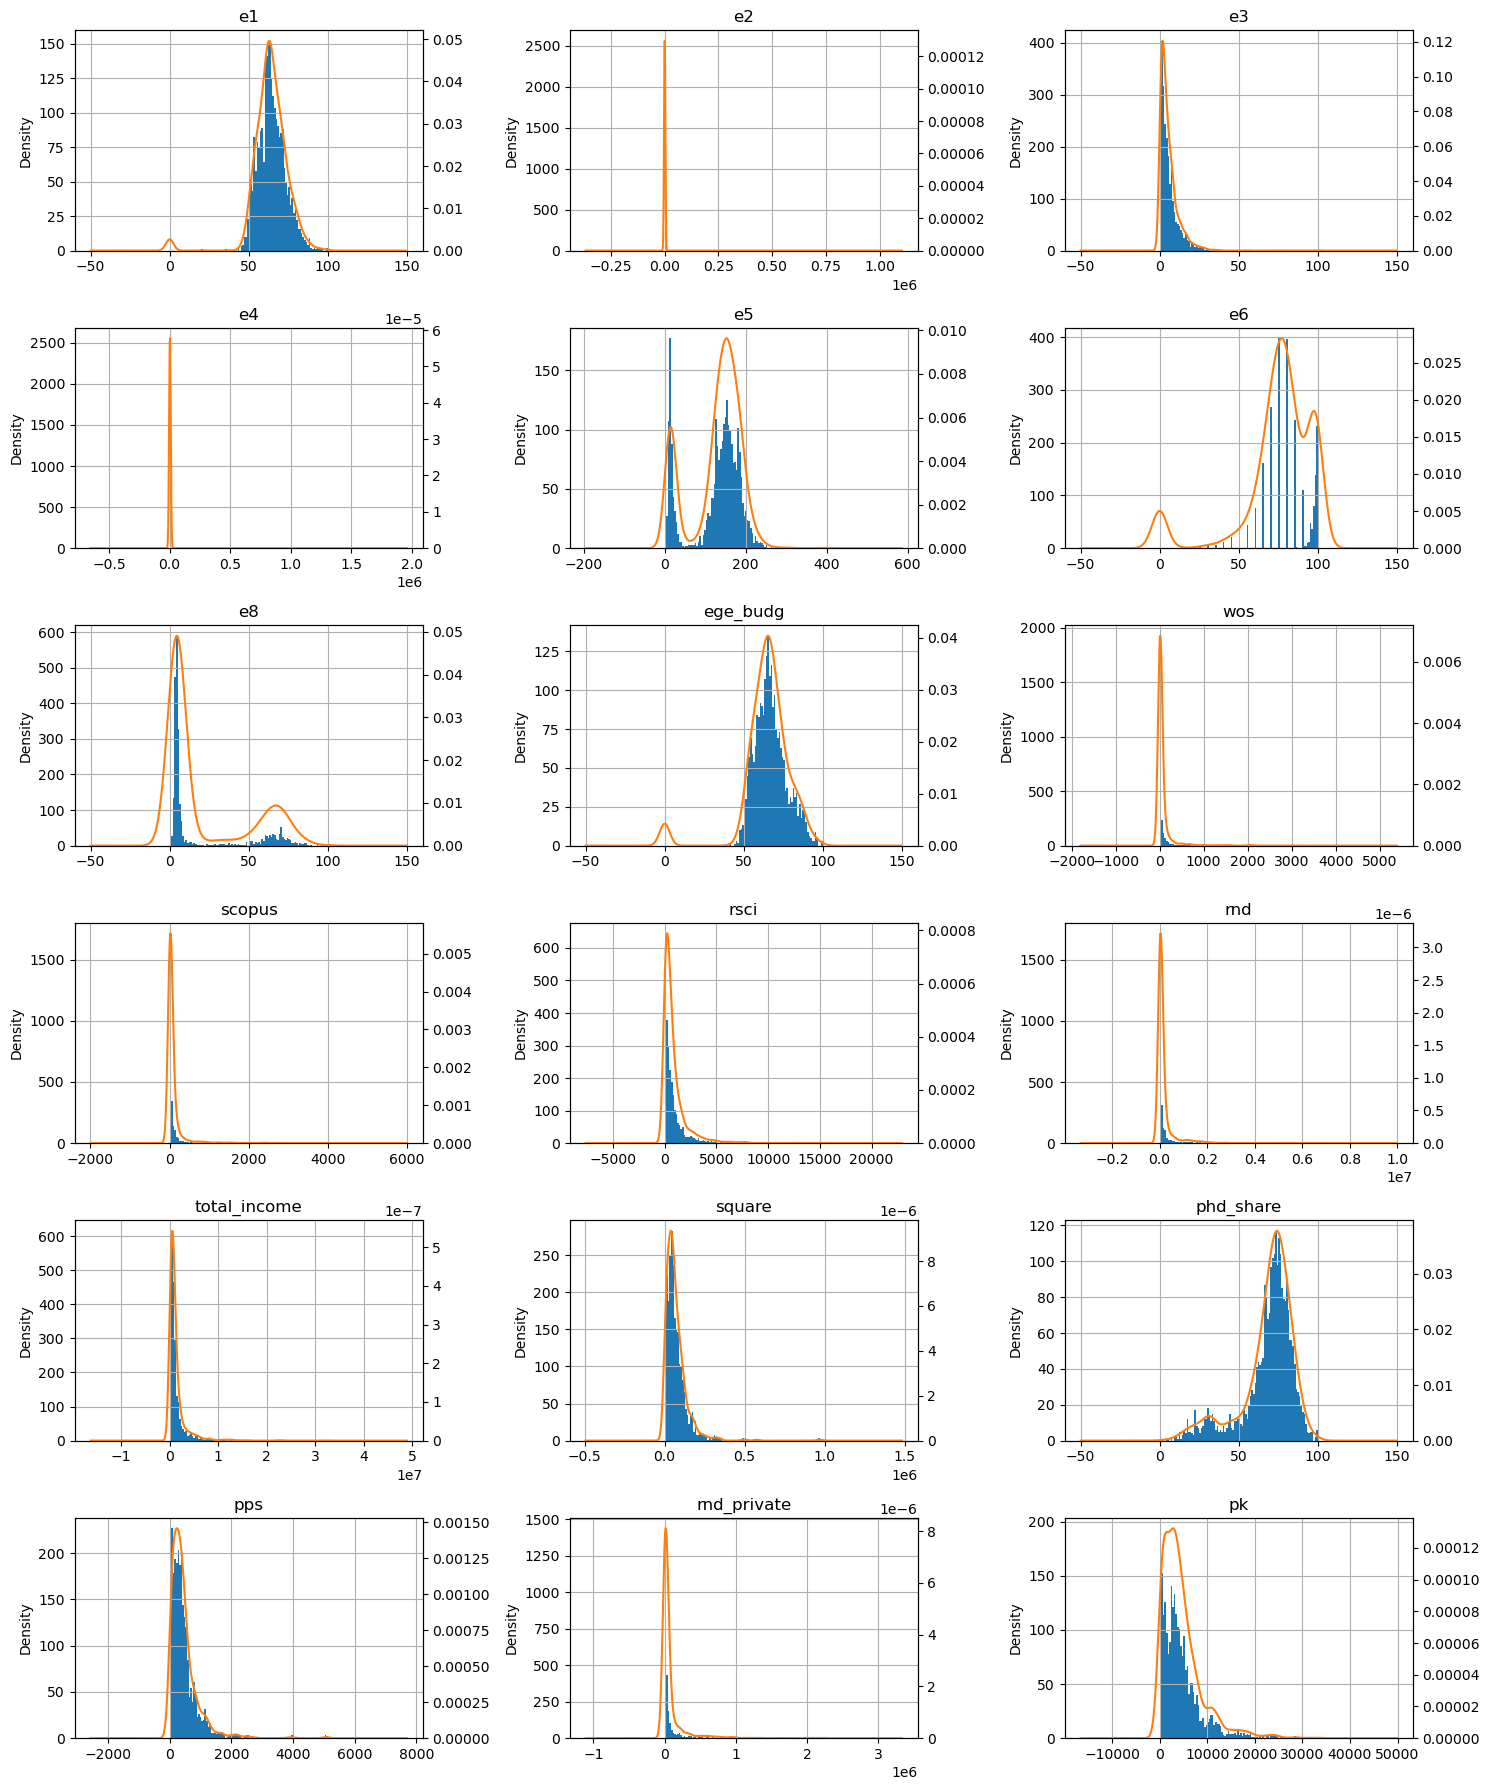

In [200]:
data_numeric = data.select_dtypes('number').drop(['region_code', 'id', 'year'], axis=1)
k = len(data_numeric.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_numeric.items()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, bins=100)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

## 6. Найти и заполнить пропуски. Реализуем метод, сравниваем описательную статистику показателя до и после заполнения пропусков, формулируем выводы: как повлияла процедура замены на распределение показателей, применимость или неприменимость метода в данном случае.

In [201]:
data.isna().sum()

federal_district_short     0
region_code                0
id                         0
name_short                 0
year                       0
e1                         0
e2                         0
e3                         0
e4                         0
e5                         0
e6                        67
e8                         0
ege_budg                   0
wos                        0
scopus                     0
rsci                       0
rnd                        0
total_income               0
square                     0
phd_share                  0
pps                        0
rnd_private                0
pk                         0
dtype: int64

В датесете присутствует 67 пропусков в столбце *e6*.

In [202]:
# индексы строк с пропущенными значениями
miss_val_ind = data[data['e6'].isnull()].index.tolist()

## Методы заполнения пропусков: 

### a. Удаление строк / столбцов с пропущенными значениями



Удаление строк, в которых присутствуют пропущенные значения.

In [203]:
data_a = data.dropna(subset=['e6'])
data_a.isna().sum()['e6']

0

### b. Замена пропущенных значений константой 



Замена пропущенных значений в строках на фиксированное число *(в данном случае 0)*.

In [204]:
data_b = data.copy()
data_b['e6'] = data_b['e6'].fillna(0)
data_b.isna().sum()['e6']

0

### c. Параметры центральной тенденции: среднее арифметическое значение, медиана, мода 

Замена пропущенных значений в строках на параметры центральной тенденции присутствующих значений *(в данном случае на арифм. среднее, моду и медиану)*.

In [205]:
data_c_av, data_c_mod, data_c_med = [data.copy() for _ in range(3)]
data_c_av['e6'] = data_c_av['e6'].fillna(data_c_av['e6'].mean())
data_c_mod['e6'] = data_c_mod['e6'].fillna(data_c_mod['e6'].mode()[0])
data_c_med['e6'] = data_c_med['e6'].fillna(data_c_med['e6'].median())
data_c_av.isna().sum()['e6'], data_c_mod.isna().sum()['e6'], data_c_med.isna().sum()['e6']

(0, 0, 0)

### d. Внутригрупповые параметры центральной тенденции: среднее арифметическое значение, медиана, мода

In [206]:
data_d_av, data_d_mod, data_d_med = [data.copy() for _ in range(3)]
data_d_av['e6'] = data_d_av.groupby('federal_district_short').apply(lambda x: x['e6'].fillna(x['e6'].mean())).droplevel(0) 
data_d_med['e6'] = data_d_mod.groupby('federal_district_short').apply(lambda x: x['e6'].fillna(x['e6'].median())).droplevel(0) 
data_d_mod['e6'] = data_d_med.groupby('federal_district_short').apply(lambda x: x['e6'].fillna(x['e6'].mode()[0])).droplevel(0) 
data_d_av.isna().sum()['e6'], data_d_med.isna().sum()['e6'], data_d_mod.isna().sum()['e6']

(0, 0, 0)

### e. Линейная / нелинейная регрессия 

In [207]:
# функция для заполнения пропущенных значений на основе других признаков, используются модели sklearn
# возможно использование для любого количества столбцов с пропущенными значениями
# предсказание основывается только на столбцах с численными типом данных
def DataFrameImputer(data: pd.DataFrame, model: sklearn.base.BaseEstimator) -> pd.DataFrame:
    data = data.copy()
    data_numeric = data.select_dtypes('number')
    
    if not data_numeric.isna().sum().sum():
        return print('Пропущенные значения отсутствуют')
    
    cols_with_miss_val = data_numeric.columns[data_numeric.isnull().any()]
    train = data_numeric.dropna()
    test = data_numeric[data_numeric.isnull().any(axis=1)]

    for col in cols_with_miss_val:
        X_train = train.drop(columns=[col])
        y_train = train[col]
        model.fit(X_train, y_train)
        X_test = test.drop(columns=[col])
        y_test = model.predict(X_test)
        data_numeric.loc[data_numeric[col].isnull(), col] = y_test

    for col in data.columns:
        if col in cols_with_miss_val:
            data[col] = data_numeric[col]

    return data

In [208]:
data_e = DataFrameImputer(data, LinearRegression())
data_e.isna().sum()['e6']

0

### f. Стохастическая линейная / нелинейная регрессия

In [209]:
# используется функция из пункта e.
data_f = DataFrameImputer(data, Ridge())
data_f.isna().sum()['e6']

0

### g. Метод k-ближайших соседей (k-NN)

In [210]:
imputer = KNNImputer(n_neighbors=15)
data_g = imputer.fit_transform(data_numeric)
data_g = pd.DataFrame(data_g, columns=data_numeric.columns)
for col in data.columns:
    if col not in data_g.columns:
        data_g[col] = data[col]
data_g.isna().sum()['e6']

0

## 6.1. Выбрать наилучший метод. В качестве эталонного метода взять k-NN. Сравнить среднее относительное отклонение 67 восстановленных значений, полученных методами b-f, от эталонных значений. 

${\displaystyle {{MAPE}}={\frac {1}{n}}\sum _{t=1}^{n}\left|{\frac {A_{t}-F_{t}}{A_{t}}}\right|}$

In [211]:
def compare(df2, df1=data_g):
    return mean_absolute_percentage_error(df1.loc[miss_val_ind]['e6'], df2.loc[miss_val_ind]['e6'])

In [212]:
result_table = PrettyTable()
result_table.add_column("Способ заполнения пропущенных значений",
["Замена на 0", "Среднее", "Медиана", "Мода", "Среднее по ФО", "Медиана по ФО", "Мода по ФО", "Линейная регрессия", "SGD регрессия"])
result_table.add_column("Величина МАРЕ",
list(map(compare, [data_b, data_c_av, data_c_med, data_c_mod, data_d_av, data_d_med, data_d_mod, data_e, data_f])))
print(result_table.get_string(sortby="Величина МАРЕ"))

+----------------------------------------+---------------------+
| Способ заполнения пропущенных значений |    Величина МАРЕ    |
+----------------------------------------+---------------------+
|                  Мода                  |  0.0725326953432615 |
|                Среднее                 | 0.07262520628665185 |
|             Среднее по ФО              | 0.08795146317852298 |
|                Медиана                 | 0.09753155833122137 |
|             Медиана по ФО              | 0.10422236480985754 |
|               Мода по ФО               | 0.10422236480985754 |
|           Линейная регрессия           |  0.1322665337195364 |
|             SGD регрессия              | 0.13227138608047692 |
|              Замена на 0               |         1.0         |
+----------------------------------------+---------------------+


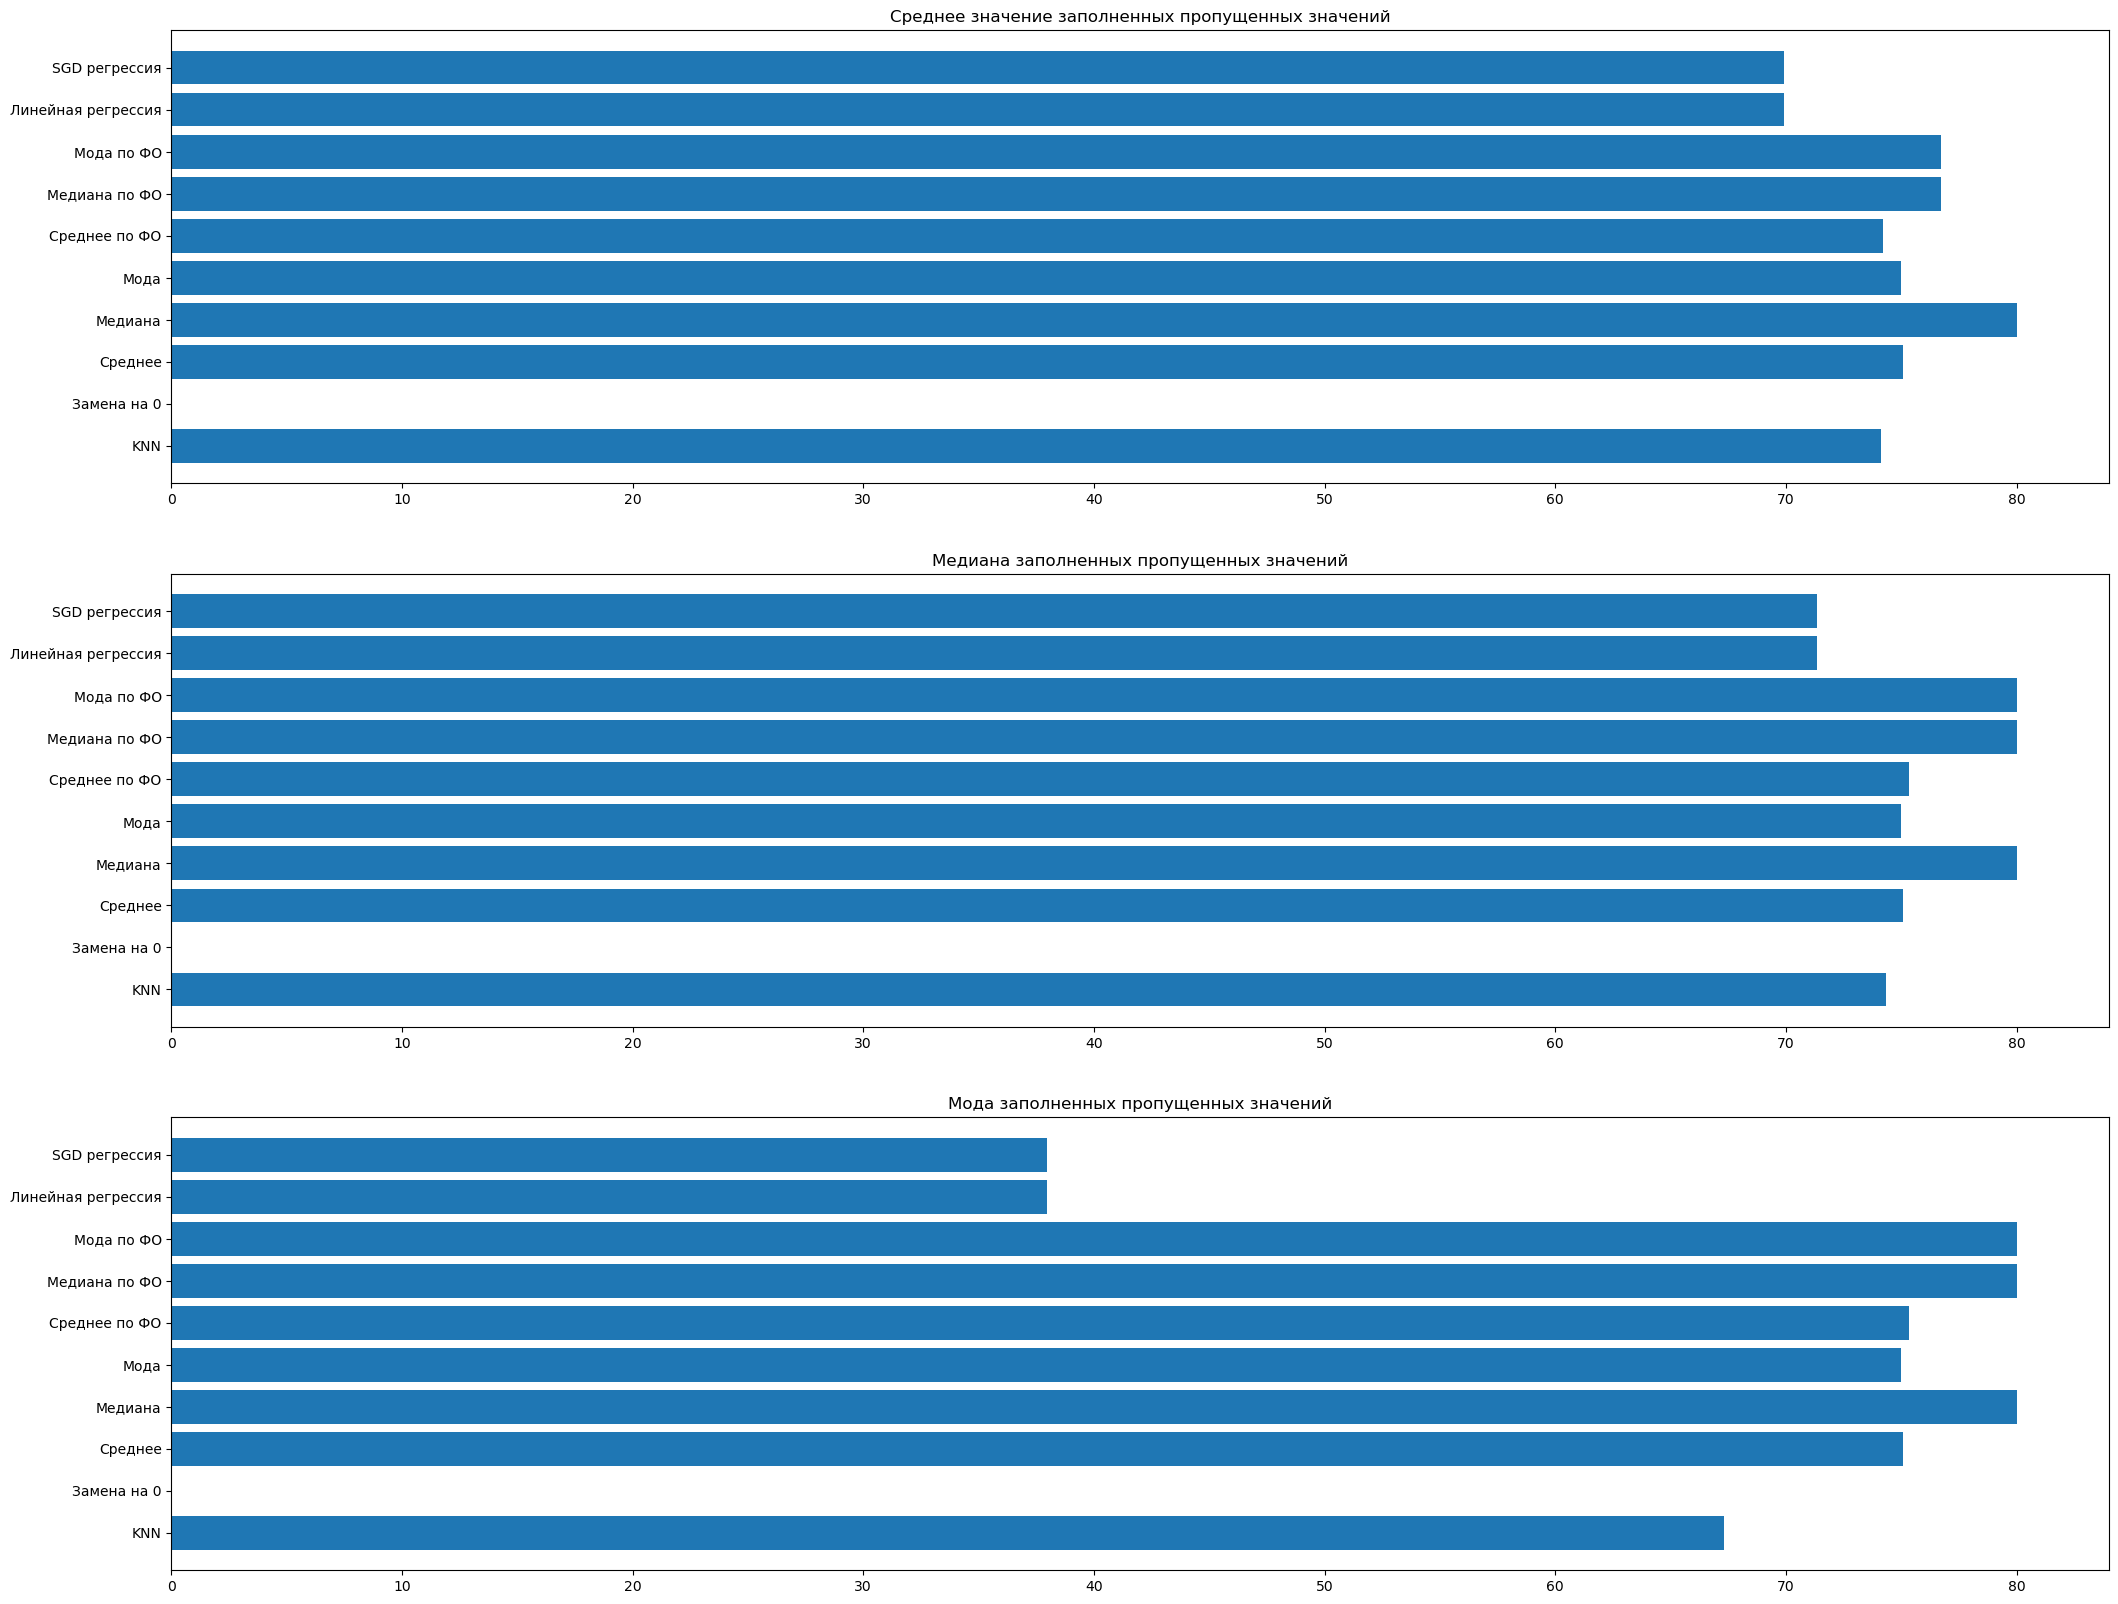

In [238]:
labels = ["KNN", "Замена на 0", "Среднее", "Медиана", "Мода", "Среднее по ФО", "Медиана по ФО", "Мода по ФО", "Линейная регрессия", "SGD регрессия"]
datas = list(map(lambda x: x['e6'].iloc[miss_val_ind], [data_g, data_b, data_c_av, data_c_med, data_c_mod, data_d_av, data_d_med, data_d_mod, data_e, data_f]))
fig = plt.figure(figsize=(25, 20))
plt.subplot(3, 1, 1)
plt.barh(labels, list(map(lambda x: x.mean(), datas)))
plt.title('Среднее значение заполненных пропущенных значений')
plt.subplot(3, 1, 2)
plt.barh(labels, list(map(lambda x: x.median(), datas)))
plt.title('Медиана заполненных пропущенных значений')
plt.subplot(3, 1, 3)
plt.barh(labels, list(map(lambda x: x.mode()[0], datas)))
plt.title('Мода заполненных пропущенных значений')
plt.show()

## Работа с выбросами. Определить выбросы по каждому показателю. Провести содержательный анализ выбросов: какие вузы, в какой период, является ли выброс случайным или закономерным (используйте динамику по годам). Как следует обработать выбросы? Подберите метод и приведите обоснование. Как изменился ряд после обработки выбросов, анализ до / после. 

${\displaystyle {\text{IQR}}=Q_{3}-Q_{1}}$

In [215]:
def RemoveOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = iqr(data[col])
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if ((x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

## Описательный анализ показателей. Выводы 

## Графический анализ показателей. Выводы о структуре данных. 

## Корреляционный анализ показателей. Выводы о взаимосвязях. Что на что влияет? Сформулировать модель «белый ящик» взаимосвязи показателей, модель результативности деятельности вуза. 

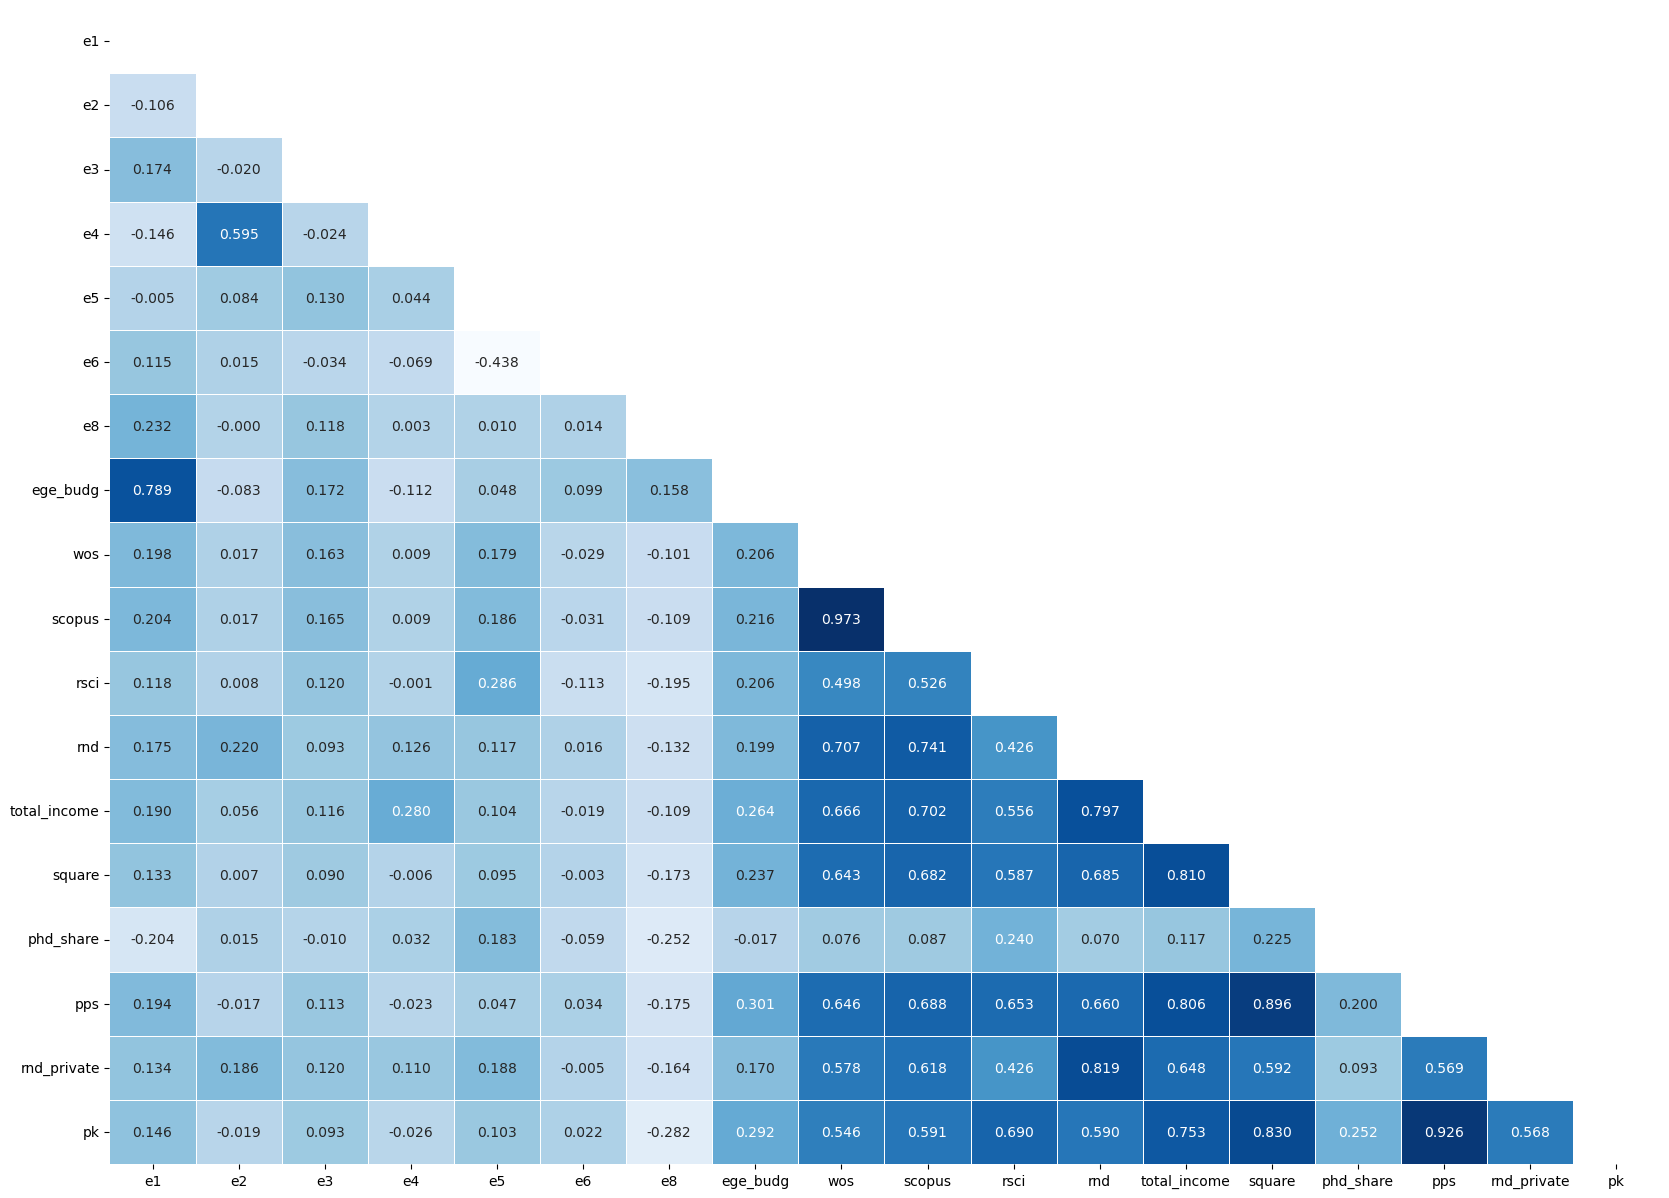

In [214]:
corr = data_numeric.corr()
plt.figure(figsize = (20, 15))
ax = sns.heatmap(corr, annot=True, cbar=False, fmt=".3f", linewidth=.5, cmap='Blues', mask=np.triu(corr))
plt.show()